<a href="https://colab.research.google.com/github/winkey1rd/Text-Data-analysis/blob/main/TextDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Вопросы карьеры.csv to Вопросы карьеры.csv
Saving Вредные привычки, зависимость.csv to Вредные привычки, зависимость.csv
Saving Горе, потери.csv to Горе, потери.csv
Saving Депрессия.csv to Депрессия.csv
Saving Нервные расстройства.csv to Нервные расстройства.csv
Saving О достижении цели.csv to О достижении цели.csv
Saving Отношения с окружающими.csv to Отношения с окружающими.csv
Saving Поиск решения.csv to Поиск решения.csv
Saving Проблемы с детьми.csv to Проблемы с детьми.csv
Saving Проблемы с партнером.csv to Проблемы с партнером.csv
Saving Размышления о мире.csv to Размышления о мире.csv
Saving Самопознание, саморазвитие.csv to Самопознание, саморазвитие.csv
Saving Семейные проблемы.csv to Семейные проблемы.csv


In [2]:
!ls

 sample_data			     'Отношения с окружающими.csv'
'Вопросы карьеры.csv'		     'Поиск решения.csv'
'Вредные привычки, зависимость.csv'  'Проблемы с детьми.csv'
'Горе, потери.csv'		     'Проблемы с партнером.csv'
 Депрессия.csv			     'Размышления о мире.csv'
'Нервные расстройства.csv'	     'Самопознание, саморазвитие.csv'
'О достижении цели.csv'		     'Семейные проблемы.csv'


Let's create 2 files: training and test data

test data - 20%

In [3]:
from sklearn.model_selection import train_test_split
import os
import glob

In [4]:
extension = 'csv'
file_names = [i for i in glob.glob('*.{}'.format(extension))]
file_names_size = len(file_names);

Let's mark the data: add a column in which the value will mean the category number

In [5]:
import pandas as pd
import numpy as np

In [6]:
data_train = []
data_test = []

i = 0
while i<file_names_size:
  df = pd.read_csv(file_names[i], header=0)
  df['THEME'] = i
  train, test = train_test_split(df, test_size=0.2)
  data_train.append(train)
  data_test.append(test)
  i = i + 1

In [7]:
data_test[7][:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
756,756,u282071,Лина 2018,Переедание. Поможет ли КПТ?,"Я давно забросила диеты, но продолжаю переедат...",2018-11-14 21:56,0,https://www.b17.ru/forum/topic.php?id=139370,7
418,418,u444537,Хочу жить здорово,"Найти опору,или как выйти из алкогользависимых...","Здравствуйте,Анна!Мне 40 лет.В разводе с 2012г...",2019-07-12 17:45,2,https://www.b17.ru/forum/topic.php?id=171631,7
284,284,u461965,id461965,"Зависимость от еды - не хочу, но ем.","Начну с того, что я всегда была полной девочко...",2019-10-18 20:49,3,https://www.b17.ru/forum/topic.php?id=185211,7


In [8]:
data_train[2][:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
630,630,u208599,BlueWolf,"Не знаю, как отстоять свои границы, кроме как ...","Окружающие слов не понимают, пока им не устрои...",2020-02-16 20:59,8,https://www.b17.ru/forum/topic.php?id=302983,2
117,117,u362977,Легко,"Сюда слушай, я сказала","У меня такая черта дурацкая. Я её смягчаю, смя...",2020-05-12 21:47,19,https://www.b17.ru/forum/topic.php?id=314503,2
622,622,u447950,Белка33,Развитие дружбы! Открытия,"Друзья, психологи! Я эгоистичный, себялюбивый ...",2020-02-18 02:31,4,https://www.b17.ru/forum/topic.php?id=303169,2


combining the data into a single file

-train

In [13]:
final_data_train = pd.concat(data_train)
final_data_train.to_csv( 'train.csv', index=False, encoding='utf-8-sig')
!wc -l train.csv

10546 train.csv


-test

In [14]:
final_data_test = pd.concat(data_test)
final_data_test.to_csv( "test.csv", index=False, encoding='utf-8-sig')
!wc -l test.csv

2641 test.csv


In [15]:
train = pd.read_csv('train.csv', header=0)
train[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,432,u325981,Emily95,боязнь старости,"Здравствуйте! Меня зовут Юлия, мне 24 года. В ...",2020-02-05 18:52,4,https://www.b17.ru/forum/topic.php?id=301385,0
1,316,u422836,Melchior,Сильное напряжение после ограбления,"Добрый день.Вчера пришла домой с работы, дверь...",2020-03-04 08:25,3,https://www.b17.ru/forum/topic.php?id=305282,0
2,988,u456775,id456775,Кто я?,Я хочу получить ответ на вопрос - кто я?Нарцис...,2019-09-03 19:47,0,https://www.b17.ru/forum/topic.php?id=178927,0


In [177]:
test = pd.read_csv('test.csv', header=0)
test[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,807,u471146,Ножницы и смех,ПТСР что может помочь?,Я прошла через очень тяжелое физически и эмоци...,2019-10-29 15:57,3,https://www.b17.ru/forum/topic.php?id=186782,0
1,148,u484434,Miss Byron,Как справиться с симптомами ПТСР из-за абьюзив...,Здравствуйте! Это моя первая попытка получить ...,2020-04-21 22:06,4,https://www.b17.ru/forum/topic.php?id=311670,0
2,121,u340395,Иван Копчёный,Всё невкусно.,"Всё невкусно, кто то сталкивался с подобным? э...",2020-04-27 14:39,7,https://www.b17.ru/forum/topic.php?id=312442,0


In [17]:
from tensorflow.keras import utils

Protection against unexpected strings such as 'nan'

In [18]:
trb_nan_idx = train[pd.isnull(train['MESSAGE'])].index.tolist()
train.loc[trb_nan_idx, 'MESSAGE'] = ' '
train.loc[trb_nan_idx, 'MESSAGE'] = ' '

In [19]:
x_train = train['MESSAGE']
y_train = utils.to_categorical(train['THEME'],file_names_size)

In [20]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

get a word form for each token (stemming)

In [21]:
def token_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    print(type(stems))
    return stems

In [ ]:
upd_x_train = []

for i in x_train:
  upd_train = token_and_stem(i)
  upd_x_train.append(upd_train)

exclude the most popular words that do not carry a semantic load (stop words)

In [43]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
#можно расширить список стоп-слов
stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', 'к', 'на'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
len(upd_x_train)


10532

In [46]:
tokens = []
train = []

for x_tr in upd_x_train:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  train.append(tokens)
  tokens = []

In [47]:
x_train

0        Здравствуйте! Меня зовут Юлия, мне 24 года. В ...
1        Добрый день.Вчера пришла домой с работы, дверь...
2        Я хочу получить ответ на вопрос - кто я?Нарцис...
3        Здравствуйте, столкнулась с тем что произношу ...
4        Уже где-то... года 2-3 за собой такое замечаю....
                               ...                        
10527    Добрый день, Людмила Григорьевна.Хочу попробов...
10528    Здравствуйте, Вера! Большое спасибо, что взяли...
10529    Я играю на двух музыкальных инструментах и мне...
10530    Здравствуйте, у меня сейчас очень сложный пери...
10531    Всем добрый вечер!Тема не нова, может, даже ко...
Name: MESSAGE, Length: 10532, dtype: object

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

creating tokenizers for each of the data sets (processed and source)

In [51]:
num_words = 5000
tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
upd_tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')

In [52]:
tokenizer.fit_on_texts(x_train)
upd_tokenizer.fit_on_texts(train)

In [53]:
tokenizer.word_index

{'и': 1,
 'не': 2,
 'я': 3,
 'в': 4,
 'что': 5,
 'с': 6,
 'на': 7,
 'как': 8,
 'то': 9,
 'но': 10,
 'меня': 11,
 'мне': 12,
 'это': 13,
 'у': 14,
 'а': 15,
 'он': 16,
 'все': 17,
 'так': 18,
 'к': 19,
 'по': 20,
 'за': 21,
 'очень': 22,
 'от': 23,
 'она': 24,
 'себя': 25,
 'его': 26,
 'из': 27,
 'или': 28,
 'было': 29,
 'когда': 30,
 'уже': 31,
 'бы': 32,
 'если': 33,
 'есть': 34,
 'могу': 35,
 'нет': 36,
 'мы': 37,
 'просто': 38,
 'лет': 39,
 'сейчас': 40,
 'хочу': 41,
 'о': 42,
 'для': 43,
 'же': 44,
 'только': 45,
 'время': 46,
 'даже': 47,
 'чтобы': 48,
 'до': 49,
 'со': 50,
 'вот': 51,
 'может': 52,
 'этого': 53,
 'день': 54,
 'знаю': 55,
 'ли': 56,
 'потом': 57,
 'после': 58,
 'еще': 59,
 'была': 60,
 'ничего': 61,
 'себе': 62,
 'быть': 63,
 'ее': 64,
 'раз': 65,
 'жизни': 66,
 'всё': 67,
 'делать': 68,
 'этом': 69,
 'они': 70,
 'года': 71,
 'больше': 72,
 'ему': 73,
 'чем': 74,
 'понимаю': 75,
 'вообще': 76,
 'много': 77,
 'тоже': 78,
 'ни': 79,
 'него': 80,
 'был': 81,
 'потому

In [54]:
upd_tokenizer.word_index

{'эт': 1,
 'мен': 2,
 'мо': 3,
 'себ': 4,
 'сво': 5,
 'очен': 6,
 'котор': 7,
 'ег': 8,
 'е': 9,
 'ил': 10,
 'друг': 11,
 'работ': 12,
 'мог': 13,
 'когд': 14,
 'пот': 15,
 'жизн': 16,
 'есл': 17,
 'ест': 18,
 'прост': 19,
 'дела': 20,
 'год': 21,
 'лет': 22,
 'говор': 23,
 'отношен': 24,
 'хоч': 25,
 'ещ': 26,
 'тольк': 27,
 'врем': 28,
 'больш': 29,
 'даж': 30,
 'человек': 31,
 'понима': 32,
 'нача': 33,
 'стал': 34,
 'сказа': 35,
 'чувств': 36,
 'хот': 37,
 'мног': 38,
 'зна': 39,
 'работа': 40,
 'одн': 41,
 'ден': 42,
 'нич': 43,
 'муж': 44,
 'быт': 45,
 'хочет': 46,
 'нужн': 47,
 'посл': 48,
 'ем': 49,
 'хорош': 50,
 'проблем': 51,
 'дом': 52,
 'дума': 53,
 'мам': 54,
 'люд': 55,
 'вообщ': 56,
 'хотел': 57,
 'постоя': 58,
 'нег': 59,
 'тож': 60,
 'месяц': 61,
 'что-т': 62,
 'дел': 63,
 'всегд': 64,
 'ситуац': 65,
 'вопрос': 66,
 'люб': 67,
 'тог': 68,
 'бол': 69,
 'сильн': 70,
 'сдела': 71,
 'мысл': 72,
 'психолог': 73,
 'част': 74,
 'добр': 75,
 'мно': 76,
 'поня': 77,
 'можн': 7

In [55]:
sequences = tokenizer.texts_to_sequences(x_train)
upd_sequences = upd_tokenizer.texts_to_sequences(train)

In [56]:
print(x_train[0])
print(sequences[0])
print(train[0])
print(upd_sequences[0])

Здравствуйте! Меня зовут Юлия, мне 24 года. В последнее время, а точнее, последние 2 года меня одолевает страх старости. Проявляется он следующим образом, я отвлекаюсь во время работы, чтобы посмотреться в зеркало и убедиться, что там всё ок (победа в конкурсе красоты и внимание людей на улице, видимо, отразились) , каждый вечер по часу кручусь в ванне проверяю что изменилось, хотя устала и лучше б полежала.) Работа у меня это симбиоз математики и программирования, поэтому много приходится сидеть. Но я не могу сидеть дольше 40 минут, не рассматривая себя и не делая упражнений для лица.)) Вместо того, чтобы лечь спать и хорошо выспаться, я делаю упражнения на осанку, массаж. Могу гуглить часами всякие витамины и крема. Со стороны, наверно, звучит не угрожающе, а смешно, но мне уже не до смеха. Я себя всю измучала этой красотой и страхом старости. Подскажите, как можно себя убедить в том, что это неизбежный этап жизни каждого человека и спокойно трудиться и радоваться жизнью?
[94, 11, 59

In [57]:
max_text_len = 100
x_train = pad_sequences(sequences, maxlen=max_text_len)
upd_x_train = pad_sequences(upd_sequences, maxlen=max_text_len)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU

In [71]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_text_len))
model_cnn.add(Conv1D(2*file_names_size**2, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(file_names_size**2, activation='relu'))
model_cnn.add(Dense(file_names_size, activation='softmax'))

In [72]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [73]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 338)           54418     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 338)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 169)               57291     
_________________________________________________________________
dense_5 (Dense)              (None, 13)                2210      
Total params: 273,919
Trainable params: 273,919
Non-trainable params: 0
_________________________________________________________________


In [74]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [75]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
upd_model_cnn_save_path = 'upd_best_model_cnn.h5'
upd_checkpoint_callback_cnn = ModelCheckpoint(upd_model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [76]:
upd_history_cnn = model_cnn.fit(upd_x_train, 
                            y_train, 
                            epochs=15,
                            batch_size=256,
                            validation_split=0.2,
                            callbacks=[upd_checkpoint_callback_cnn])

Epoch 1/15
33/33 [==============================] - 10s 287ms/step - loss: 2.4507 - accuracy: 0.0941 - val_loss: 5.3422 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to upd_best_model_cnn.h5
Epoch 2/15
33/33 [==============================] - 9s 280ms/step - loss: 2.3487 - accuracy: 0.1507 - val_loss: 7.0232 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/15
33/33 [==============================] - 9s 278ms/step - loss: 2.2371 - accuracy: 0.2385 - val_loss: 8.0377 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/15
33/33 [==============================] - 9s 279ms/step - loss: 1.9383 - accuracy: 0.3528 - val_loss: 9.7252 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/15
33/33 [==============================] - 9s 280ms/step - loss: 1.6480 - accuracy: 0.4545 - val_loss: 11.0682 - val_accuracy: 0.0218

Epoch 0

In [77]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=15,
                            batch_size=256,
                            validation_split=0.2,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/15
33/33 [==============================] - 9s 272ms/step - loss: 3.4293 - accuracy: 0.1621 - val_loss: 15.0781 - val_accuracy: 9.4922e-04

Epoch 00001: val_accuracy improved from -inf to 0.00095, saving model to best_model_cnn.h5
Epoch 2/15
33/33 [==============================] - 9s 270ms/step - loss: 1.7885 - accuracy: 0.4012 - val_loss: 13.8372 - val_accuracy: 0.0066

Epoch 00002: val_accuracy improved from 0.00095 to 0.00664, saving model to best_model_cnn.h5
Epoch 3/15
33/33 [==============================] - 9s 275ms/step - loss: 1.4610 - accuracy: 0.5256 - val_loss: 14.0978 - val_accuracy: 0.0024

Epoch 00003: val_accuracy did not improve from 0.00664
Epoch 4/15
33/33 [==============================] - 9s 274ms/step - loss: 1.2492 - accuracy: 0.5976 - val_loss: 14.2149 - val_accuracy: 0.0095

Epoch 00004: val_accuracy improved from 0.00664 to 0.00949, saving model to best_model_cnn.h5
Epoch 5/15
33/33 [==============================] - 9s 274ms/step - loss: 1.0780 - acc

In [78]:
import matplotlib.pyplot as plt

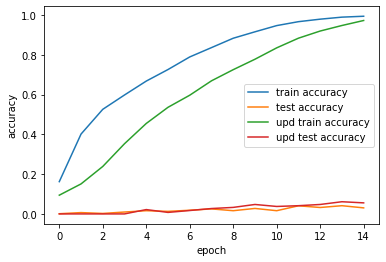

In [79]:
plt.plot(history_cnn.history['accuracy'], 
         label='train accuracy')
plt.plot(history_cnn.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_cnn.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_cnn.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [80]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_text_len))
model_lstm.add(LSTM(169))
model_lstm.add(Dense(13, activation='softmax'))

In [81]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [82]:
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 169)               136552    
_________________________________________________________________
dense_6 (Dense)              (None, 13)                2210      
Total params: 298,762
Trainable params: 298,762
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
upd_model_lstm_save_path = 'upd_best_model_lstm.h5'
upd_checkpoint_callback_lstm = ModelCheckpoint(upd_model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [84]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/15
33/33 [==============================] - 29s 823ms/step - loss: 2.4434 - accuracy: 0.0940 - val_loss: 5.8013 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_lstm.h5
Epoch 2/15
33/33 [==============================] - 27s 809ms/step - loss: 2.3858 - accuracy: 0.0986 - val_loss: 6.1548 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/15
33/33 [==============================] - 27s 806ms/step - loss: 2.3665 - accuracy: 0.1462 - val_loss: 5.8168 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/15
33/33 [==============================] - 26s 804ms/step - loss: 2.3008 - accuracy: 0.2015 - val_loss: 5.0269 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/15
33/33 [==============================] - 26s 804ms/step - loss: 2.1285 - accuracy: 0.2819 - val_loss: 4.9159 - val_accuracy: 0.0000e+00

Epo

In [85]:
upd_history_lstm = model_lstm.fit(upd_x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[upd_checkpoint_callback_lstm])

Epoch 1/15
33/33 [==============================] - 27s 815ms/step - loss: 2.7709 - accuracy: 0.1129 - val_loss: 3.2787 - val_accuracy: 0.0028

Epoch 00001: val_accuracy improved from -inf to 0.00285, saving model to upd_best_model_lstm.h5
Epoch 2/15
33/33 [==============================] - 27s 816ms/step - loss: 2.3820 - accuracy: 0.1758 - val_loss: 3.9594 - val_accuracy: 4.7461e-04

Epoch 00002: val_accuracy did not improve from 0.00285
Epoch 3/15
33/33 [==============================] - 27s 822ms/step - loss: 2.2224 - accuracy: 0.2297 - val_loss: 4.9321 - val_accuracy: 4.7461e-04

Epoch 00003: val_accuracy did not improve from 0.00285
Epoch 4/15
33/33 [==============================] - 27s 808ms/step - loss: 2.0095 - accuracy: 0.3112 - val_loss: 5.9376 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00285
Epoch 5/15
33/33 [==============================] - 26s 790ms/step - loss: 1.7581 - accuracy: 0.3995 - val_loss: 5.8749 - val_accuracy: 0.0066

Epoch 0

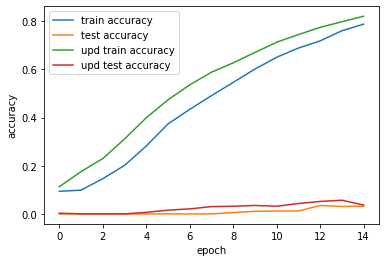

In [86]:
plt.plot(history_lstm.history['accuracy'], 
         label='train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_lstm.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_lstm.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [87]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_text_len))
model_gru.add(GRU(169))
model_gru.add(Dense(13, activation='softmax'))

In [88]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [89]:
model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
gru (GRU)                    (None, 169)               102921    
_________________________________________________________________
dense_7 (Dense)              (None, 13)                2210      
Total params: 265,131
Trainable params: 265,131
Non-trainable params: 0
_________________________________________________________________


In [90]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
upd_model_gru_save_path = 'upd_best_model_gru.h5'
upd_checkpoint_callback_gru = ModelCheckpoint(upd_model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [91]:
upd_history_gru = model_gru.fit(upd_x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[upd_checkpoint_callback_gru])

Epoch 1/15
33/33 [==============================] - 25s 685ms/step - loss: 2.4602 - accuracy: 0.0957 - val_loss: 4.7888 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to upd_best_model_gru.h5
Epoch 2/15
33/33 [==============================] - 22s 667ms/step - loss: 2.3720 - accuracy: 0.1397 - val_loss: 6.3306 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/15
33/33 [==============================] - 22s 669ms/step - loss: 2.3319 - accuracy: 0.1816 - val_loss: 5.9257 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/15
33/33 [==============================] - 22s 672ms/step - loss: 2.1994 - accuracy: 0.2954 - val_loss: 5.7015 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/15
33/33 [==============================] - 22s 670ms/step - loss: 1.9358 - accuracy: 0.3769 - val_loss: 6.0111 - val_accuracy: 0.0000e+00



In [92]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/15
33/33 [==============================] - 22s 663ms/step - loss: 3.0766 - accuracy: 0.1085 - val_loss: 3.2443 - val_accuracy: 0.0085

Epoch 00001: val_accuracy improved from -inf to 0.00854, saving model to best_model_gru.h5
Epoch 2/15
33/33 [==============================] - 22s 658ms/step - loss: 2.4003 - accuracy: 0.1771 - val_loss: 3.9564 - val_accuracy: 9.4922e-04

Epoch 00002: val_accuracy did not improve from 0.00854
Epoch 3/15
33/33 [==============================] - 22s 663ms/step - loss: 2.2256 - accuracy: 0.2304 - val_loss: 4.6098 - val_accuracy: 4.7461e-04

Epoch 00003: val_accuracy did not improve from 0.00854
Epoch 4/15
33/33 [==============================] - 22s 672ms/step - loss: 2.0986 - accuracy: 0.2818 - val_loss: 5.2152 - val_accuracy: 4.7461e-04

Epoch 00004: val_accuracy did not improve from 0.00854
Epoch 5/15
33/33 [==============================] - 22s 666ms/step - loss: 1.9655 - accuracy: 0.3339 - val_loss: 5.7498 - val_accuracy: 4.7461e-04

Epoch 00

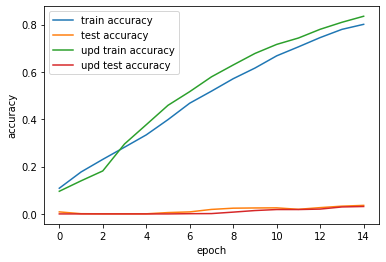

In [93]:
plt.plot(history_gru.history['accuracy'], 
         label='train accuracy')
plt.plot(history_gru.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_gru.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_gru.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [190]:
y_test = utils.to_categorical(test['THEME'],file_names_size)

In [191]:
x_test = test['MESSAGE']

In [ ]:
upd_x_test = []

for i in x_test:
  upd_test = token_and_stem(i)
  upd_x_test.append(upd_test)

In [193]:
tokens = []
upd_test = []

for x_tr in upd_x_test:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  upd_test.append(tokens)
  tokens = []

In [194]:
test_sequences = tokenizer.texts_to_sequences(x_test)
upd_test_sequences = upd_tokenizer.texts_to_sequences(upd_test)

In [195]:
x_test = pad_sequences(test_sequences, maxlen=max_text_len)
upd_x_test = pad_sequences(upd_test_sequences, maxlen=max_text_len)

In [196]:
model_cnn.load_weights(model_cnn_save_path)
model_cnn.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 1s 10ms/step - loss: 6.1924 - accuracy: 0.2964


[6.192416667938232, 0.29643669724464417]

In [197]:
from sklearn.metrics import classification_report

In [198]:
pred = model_cnn.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred

array([ 5, 10,  3, ...,  2,  6,  8])

In [199]:
answer_y_test = np.argmax(y_test, axis=1)
answer_y_test

array([ 0,  0,  0, ..., 12, 12, 12])

In [200]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:5], pred[:5])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0] [ 5 10  3  3  5]
              precision    recall  f1-score   support

           0       0.34      0.26      0.29       203
           1       0.25      0.33      0.29       203
           2       0.24      0.30      0.26       202
           3       0.28      0.41      0.33       201
           4       0.39      0.40      0.40       202
           5       0.11      0.15      0.13       201
           6       0.43      0.61      0.51       205
           7       0.29      0.41      0.34       202
           8       0.43      0.47      0.45       203
           9       0.24      0.29      0.26       204
          10       0.30      0.23      0.26       203
          11       0.00      0.00      0.00       205
          12       0.00      0.00      0.00       204

    accuracy                           0.30      2638
   macro avg       0.25      0.30      0.27      2638
weighted avg       0.25      0.30      0.27      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
model_cnn.load_weights(upd_model_cnn_save_path)
model_cnn.evaluate(upd_x_test, y_test, verbose=1)

83/83 [==============================] - 1s 10ms/step - loss: 5.9745 - accuracy: 0.3438


[5.974453449249268, 0.34382107853889465]

In [220]:
pred = model_cnn.predict(upd_x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred

array([ 0, 10,  9, ...,  4,  6,  9])

In [221]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [ 0 10  9  2  0  0  0  5  0  2]
              precision    recall  f1-score   support

           0       0.36      0.37      0.36       203
           1       0.27      0.29      0.28       203
           2       0.21      0.42      0.28       202
           3       0.38      0.38      0.38       201
           4       0.43      0.54      0.48       202
           5       0.12      0.15      0.14       201
           6       0.61      0.66      0.63       205
           7       0.42      0.53      0.47       202
           8       0.50      0.49      0.49       203
           9       0.30      0.39      0.34       204
          10       0.28      0.25      0.27       203
          11       0.00      0.00      0.00       205
          12       0.00      0.00      0.00       204

    accuracy                           0.34      2638
   macro avg       0.30      0.34      0.32      2638
weighted avg       0.30      0.34      0.32      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
model_lstm.load_weights(model_lstm_save_path)
model_lstm.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 6s 67ms/step - loss: 3.2503 - accuracy: 0.2911


[3.2503223419189453, 0.2911296486854553]

In [217]:
pred = model_lstm.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred

array([ 0,  0,  3, ..., 10,  2,  3])

In [218]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [0 0 3 5 4 4 3 0 2 2]
              precision    recall  f1-score   support

           0       0.30      0.22      0.25       203
           1       0.30      0.25      0.27       203
           2       0.18      0.43      0.26       202
           3       0.38      0.35      0.37       201
           4       0.33      0.49      0.39       202
           5       0.11      0.15      0.13       201
           6       0.47      0.75      0.58       205
           7       0.35      0.36      0.35       202
           8       0.46      0.40      0.43       203
           9       0.18      0.21      0.19       204
          10       0.26      0.18      0.21       203
          11       0.00      0.00      0.00       205
          12       0.00      0.00      0.00       204

    accuracy                           0.29      2638
   macro avg       0.26      0.29      0.26      2638
weighted avg       0.26      0.29      0.26      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [222]:
model_lstm.load_weights(upd_model_lstm_save_path)
model_lstm.evaluate(upd_x_test, y_test, verbose=1)

83/83 [==============================] - 6s 67ms/step - loss: 3.2910 - accuracy: 0.3108


[3.2910397052764893, 0.31084156036376953]

In [223]:
pred = model_lstm.predict(upd_x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred

array([ 7, 10,  8, ...,  4,  2,  8])

In [224]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [ 7 10  8  7  0  0  9  9  0  7]
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       203
           1       0.25      0.30      0.27       203
           2       0.23      0.32      0.27       202
           3       0.32      0.35      0.33       201
           4       0.39      0.53      0.45       202
           5       0.15      0.20      0.17       201
           6       0.58      0.65      0.62       205
           7       0.41      0.44      0.42       202
           8       0.42      0.44      0.43       203
           9       0.16      0.22      0.18       204
          10       0.26      0.26      0.26       203
          11       0.00      0.00      0.00       205
          12       0.00      0.00      0.00       204

    accuracy                           0.31      2638
   macro avg       0.27      0.31      0.29      2638
weighted avg       0.27      0.31      0.29      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
model_gru.load_weights(model_gru_save_path)
model_gru.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 3s 38ms/step - loss: 4.0470 - accuracy: 0.2475


[4.046996116638184, 0.24753601849079132]

In [227]:
pred = model_gru.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred

array([7, 7, 2, ..., 2, 2, 0])

In [228]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [7 7 2 5 7 0 3 8 2 3]
              precision    recall  f1-score   support

           0       0.24      0.20      0.22       203
           1       0.23      0.28      0.25       203
           2       0.16      0.30      0.21       202
           3       0.31      0.39      0.35       201
           4       0.32      0.29      0.31       202
           5       0.06      0.07      0.07       201
           6       0.40      0.65      0.50       205
           7       0.26      0.31      0.28       202
           8       0.38      0.43      0.40       203
           9       0.17      0.18      0.18       204
          10       0.18      0.11      0.14       203
          11       0.00      0.00      0.00       205
          12       0.00      0.00      0.00       204

    accuracy                           0.25      2638
   macro avg       0.21      0.25      0.22      2638
weighted avg       0.21      0.25      0.22      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [230]:
model_gru.load_weights(upd_model_gru_save_path)
model_gru.evaluate(upd_x_test, y_test, verbose=1)

83/83 [==============================] - 3s 38ms/step - loss: 3.7872 - accuracy: 0.2623


[3.787158966064453, 0.262319952249527]

In [231]:
pred = model_gru.predict(upd_x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred

array([7, 0, 8, ..., 4, 3, 8])

In [232]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [7 0 8 2 4 0 7 9 7 6]
              precision    recall  f1-score   support

           0       0.25      0.28      0.26       203
           1       0.18      0.23      0.20       203
           2       0.16      0.25      0.20       202
           3       0.24      0.30      0.27       201
           4       0.29      0.39      0.33       202
           5       0.12      0.16      0.14       201
           6       0.48      0.66      0.55       205
           7       0.29      0.34      0.31       202
           8       0.39      0.47      0.43       203
           9       0.20      0.17      0.18       204
          10       0.27      0.17      0.21       203
          11       0.00      0.00      0.00       205
          12       0.00      0.00      0.00       204

    accuracy                           0.26      2638
   macro avg       0.22      0.26      0.24      2638
weighted avg       0.22      0.26      0.24      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


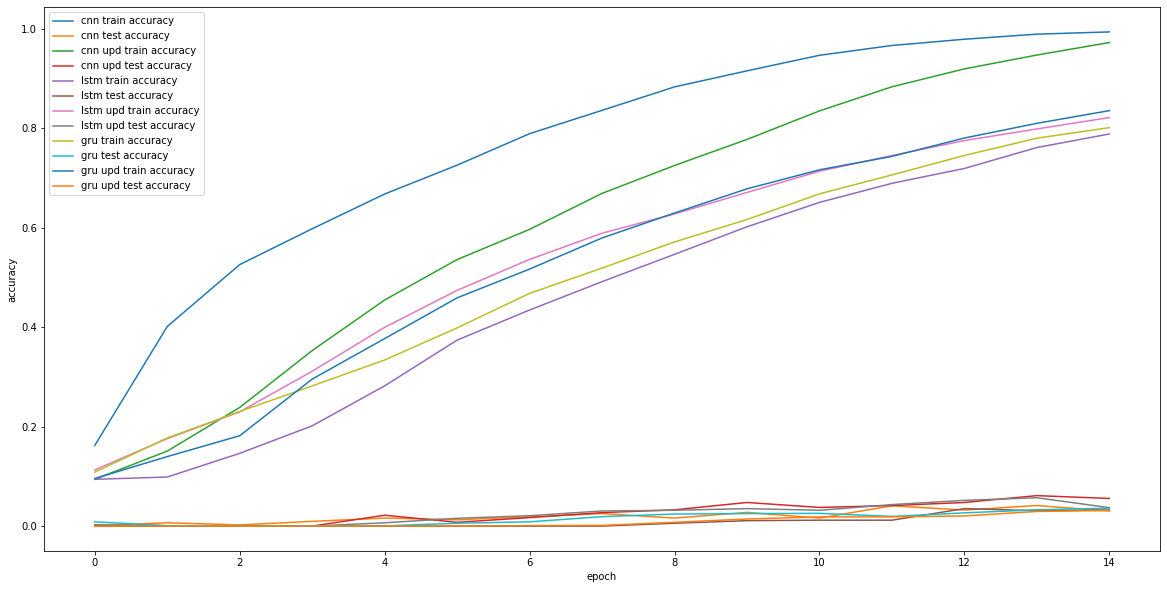

In [239]:
plt.plot(history_cnn.history['accuracy'], 
         label='cnn train accuracy')
plt.plot(history_cnn.history['val_accuracy'], 
         label='cnn test accuracy')
plt.plot(upd_history_cnn.history['accuracy'], 
         label='cnn upd train accuracy')
plt.plot(upd_history_cnn.history['val_accuracy'], 
         label='cnn upd test accuracy')

plt.plot(history_lstm.history['accuracy'], 
         label='lstm train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='lstm test accuracy')
plt.plot(upd_history_lstm.history['accuracy'], 
         label='lstm upd train accuracy')
plt.plot(upd_history_lstm.history['val_accuracy'], 
         label='lstm upd test accuracy')

plt.plot(history_gru.history['accuracy'], 
         label='gru train accuracy')
plt.plot(history_gru.history['val_accuracy'], 
         label='gru test accuracy')
plt.plot(upd_history_gru.history['accuracy'], 
         label='gru upd train accuracy')
plt.plot(upd_history_gru.history['val_accuracy'], 
         label='gru upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.rcParams["figure.figsize"] = (40,10)
plt.legend()
plt.show()